In [ ]:
import scipy as sp
import numpy as np
import pandas as pd
import pylab as py 
import sklearn

from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA


#visualização
import seaborn as sns
import IPython.display as ipd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import scatterplotmatrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
audioft_str = pd.read_csv('/content/drive/My Drive/Audio Dataset/audioft_cleanStr.csv')
audioft_nmb = pd.read_csv('/content/drive/My Drive/Audio Dataset/audioft_cleanNmb.csv')

In [ ]:
X = audioft_nmb.iloc[:,0:5].values
y = audioft_nmb['CLASS'].values

# **PIPELINE**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=123, stratify=y)

In [ ]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [90 97 96 99 99]
Labels counts in y_train: [63 68 67 69 69]
Labels counts in y_test: [27 29 29 30 30]


In [ ]:
pipe = Pipeline([('z-score', StandardScaler()), 
                 ('reduce_dim', PCA(n_components=5)), 
                 ('classify', DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0))])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('z-score',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('classify',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=4,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=0,
                                        splitter=

In [ ]:
y_test_pred = pipe.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.7586206896551724

# **GRID-SEARCH**

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
param_grid = {
 'reduce_dim__n_components': [1, 2, 3, 4, 5],
 'classify__max_depth': [1, 2, 3, 4, 5],
 'classify__min_samples_leaf': [1, 2, 3, 4, 5],
 'classify__ccp_alpha': clf.cost_complexity_pruning_path(X_train, y_train).ccp_alphas
}

In [ ]:
grid = GridSearchCV(pipe, cv=2, n_jobs=1, param_grid=param_grid, scoring='accuracy')

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('z-score',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('reduce_dim',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=5, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('classify',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='entropy',...
       0.00794325

In [ ]:
print(grid.cv_results_)

{'mean_fit_time': array([0.00181341, 0.00156796, 0.00179279, ..., 0.00210881, 0.00225377,
       0.00236833]), 'std_fit_time': array([2.35319138e-04, 2.98023224e-06, 1.51038170e-04, ...,
       9.77516174e-06, 2.86102295e-06, 1.39474869e-05]), 'mean_score_time': array([0.00050449, 0.00044644, 0.00051105, ..., 0.00046849, 0.00047433,
       0.00051534]), 'std_score_time': array([6.84261322e-05, 1.34706497e-05, 9.17911530e-06, ...,
       4.05311584e-06, 9.41753387e-06, 5.66244125e-05]), 'param_classify__ccp_alpha': masked_array(data=[0.0, 0.0, 0.0, ..., 0.966618632548103,
                   0.966618632548103, 0.966618632548103],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_classify__max_depth': masked_array(data=[1, 1, 1, ..., 5, 5, 5],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_classify__min_samples_leaf': masked_array(data=[1, 

In [ ]:
grid.cv_results_['mean_test_score']

array([0.41071429, 0.41071429, 0.41071429, ..., 0.20238095, 0.20238095,
       0.20238095])

- **Melhores Parâmetros**

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.8095238095238095
{'classify__ccp_alpha': 0.0, 'classify__max_depth': 5, 'classify__min_samples_leaf': 2, 'reduce_dim__n_components': 5}


In [ ]:
clf = grid.best_estimator_

In [ ]:
y_test_pred = clf.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.7724137931034483

- **Árvore de Decisão**

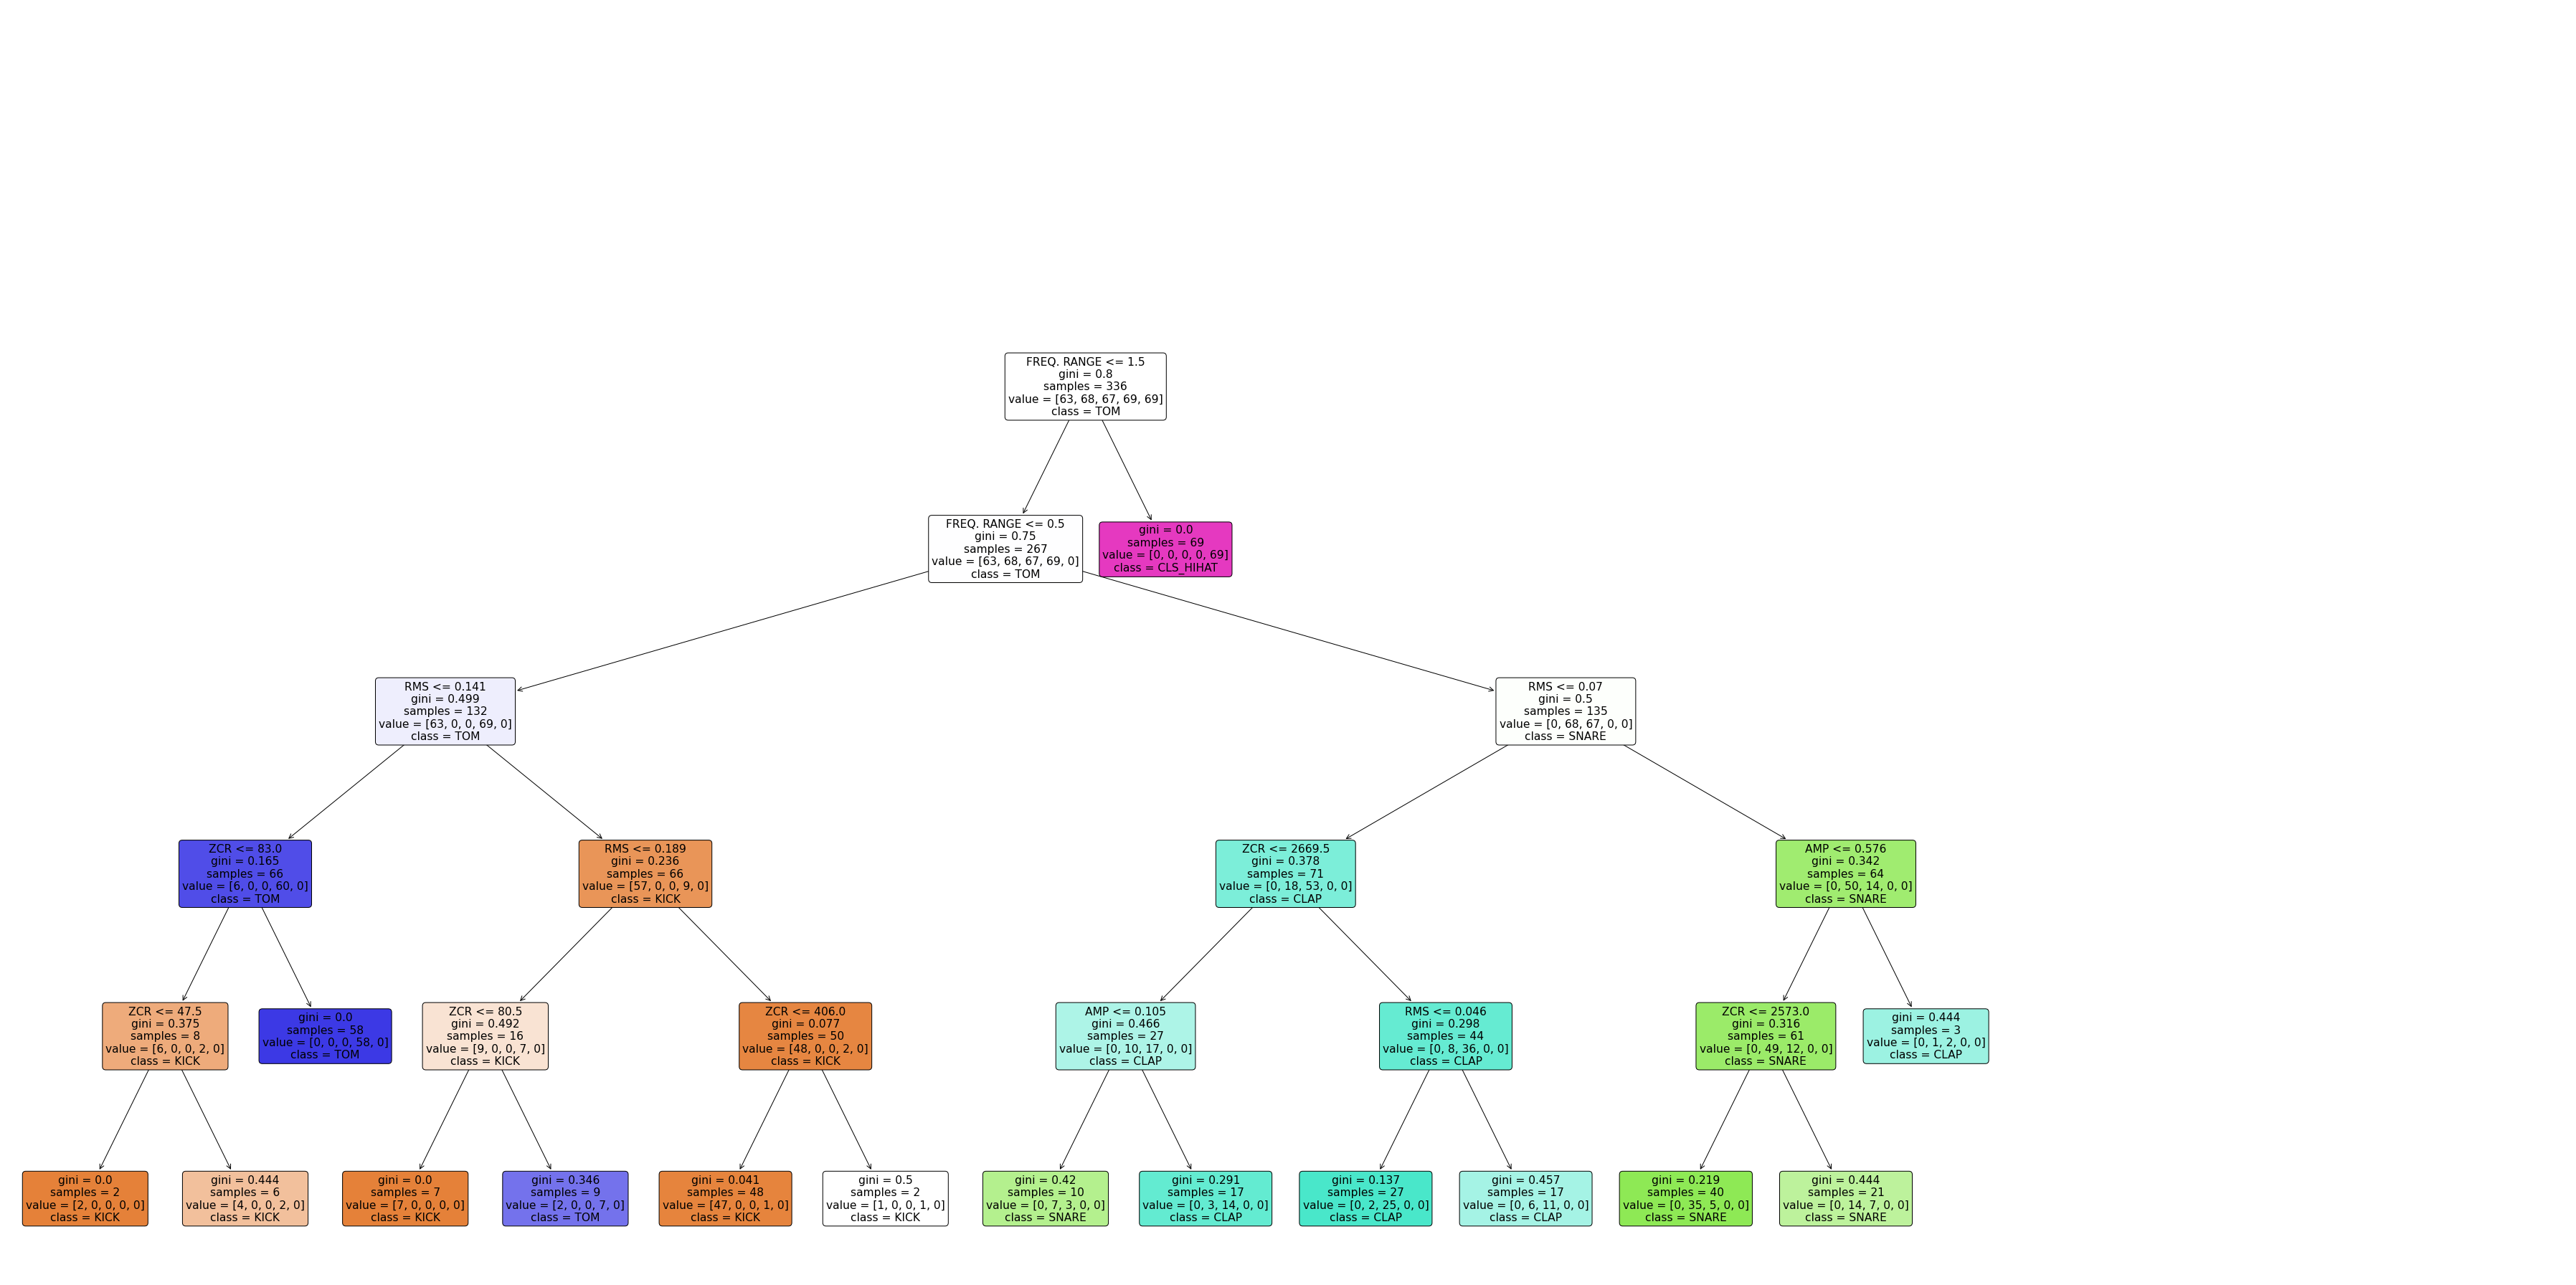

In [ ]:
class_names=['KICK','SNARE','CLAP','TOM','CLS_HIHAT']
feature_names = audioft_nmb.columns

feature_names = feature_names.drop('CLASS')
feature_names = feature_names.drop('SOURCE_Natural')
feature_names = feature_names.drop('SOURCE_Synthesized')

plt.figure(figsize=(50,25))
clf2 = DecisionTreeClassifier(ccp_alpha=0.0, max_depth=5, min_samples_leaf=2)
clf2.fit(X_train,y_train)
plot_tree(clf2, filled=True, rounded=True, class_names=class_names, feature_names=feature_names)

plt.tight_layout()
plt.savefig('/content/drive/My Drive/Audio Dataset/Arvore.JPEG')

plt.show()


# **VERIFICAÇÃO E INTERPRETAÇÃO**

In [ ]:
print(np.shape(X_test))
print(np.shape(y_test))

X_test1 = X_test[5,:]
y_test1 = y_test[5]

print(np.shape(X_test1))
print(np.shape(y_test1))

X_test1 = np.reshape(X_test1,(1,-1))
y_test1 = np.reshape(y_test1,(1))

print(np.shape(X_test1))
print(np.shape(y_test1))

(145, 5)
(145,)
(5,)
()
(1, 5)
(1,)


In [ ]:
y_test1_pred  = clf.predict(X_test1)
y_test1_pred

array([3])

In [ ]:
accuracy_score(y_test1, y_test1_pred)

1.0

In [ ]:
X_test1

array([[1.3564342e-01, 7.6194905e-02, 6.3100000e+02, 0.0000000e+00,
        0.0000000e+00]])

In [ ]:
class_names[int(y_test1_pred)]

'TOM'

In [ ]:
print('Name Class : ' + class_names[int(y_test1)])
print('Feature values: ')
for index, feature_name in enumerate(feature_names):
 print('{feature}:{value}'.format(feature = feature_name, value = X_test1[0][index]))

Name Class : TOM
Feature values: 
AMP:0.13564342
RMS:0.076194905
ZCR:631.0
FREQ. RANGE:0.0
TIME DECAY:0.0


Analisando as condições da árvore para que seja identificado um sample da Classe "TOM", há 2 séries de condições em que há possibilidade da classificação ser alcançada, sendo uma delas a que contém a grande maioria das amostras, que foi o caso que satisfez e classificou nossa amostra particular de teste. 

**OPÇÃO 1 = 58 AMOSTRAS**

**OPÇÃO 2 = 9 AMOSTRAS**

**CONDIÇÂO:**

*Se*

- *(FREQ. RANGE <= 1.5) = TRUE*

- *(FREQ. RANGE <= 0.5) = TRUE*
 
- *(RMS <= 0.141) = TRUE*

- *(ZCR <= 83) = FALSE*

*Então*
- *class = 'TOM'*